In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
#from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
#Set working directory
os.chdir("C:/Users/hp/OneDrive/Documents/edwisor/project2")

In [3]:
#Load data
df_train = pd.read_csv("C:/Users/hp/OneDrive/Documents/edwisor/project2/train.csv")
df_test=pd.read_csv("C:/Users/hp/OneDrive/Documents/edwisor/project2/test.csv")

In [4]:
# first records
df_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
#last records
df_train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [6]:
# here some info about our df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
# here a quick view of our df
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
df_train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [9]:
df_train['target']=df_train.target.astype('category')

In [10]:
df_train.dtypes

ID_code      object
target     category
var_0       float64
var_1       float64
var_2       float64
var_3       float64
var_4       float64
var_5       float64
var_6       float64
var_7       float64
var_8       float64
var_9       float64
var_10      float64
var_11      float64
var_12      float64
var_13      float64
var_14      float64
var_15      float64
var_16      float64
var_17      float64
var_18      float64
var_19      float64
var_20      float64
var_21      float64
var_22      float64
var_23      float64
var_24      float64
var_25      float64
var_26      float64
var_27      float64
             ...   
var_170     float64
var_171     float64
var_172     float64
var_173     float64
var_174     float64
var_175     float64
var_176     float64
var_177     float64
var_178     float64
var_179     float64
var_180     float64
var_181     float64
var_182     float64
var_183     float64
var_184     float64
var_185     float64
var_186     float64
var_187     float64
var_188     float64


In [11]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df_train))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_perc.csv", index = False)

In [12]:
missing_val

,Variables,Missing_percentage
0,ID_code,0.0
1,var_136,0.0
2,var_126,0.0
3,var_127,0.0
4,var_128,0.0
5,var_129,0.0
6,var_130,0.0
7,var_131,0.0
8,var_132,0.0
9,var_133,0.0


In [13]:
# putting all the df colname in a list
dfcols = list(df_train.columns)

# exculdig target and index columns
variables = dfcols[2:]

# splitting the list every n elements:
n = 10
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

In [14]:
dfcols

['ID_code',
 'target',
 'var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89

In [15]:
variables

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

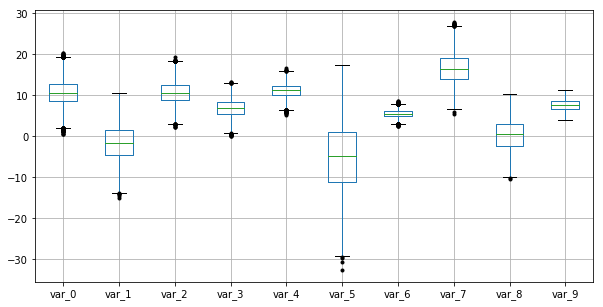

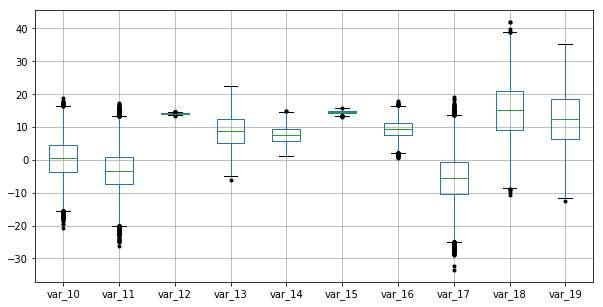

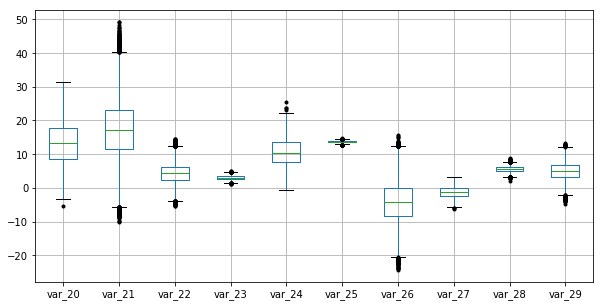

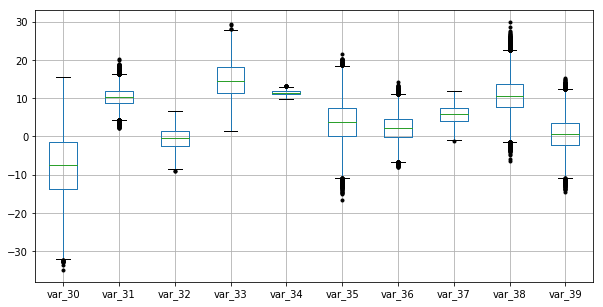

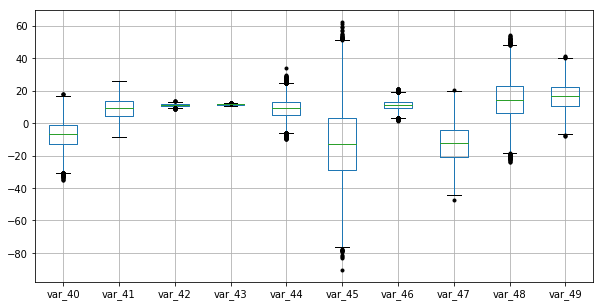

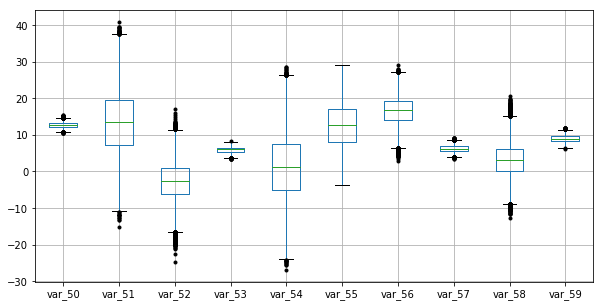

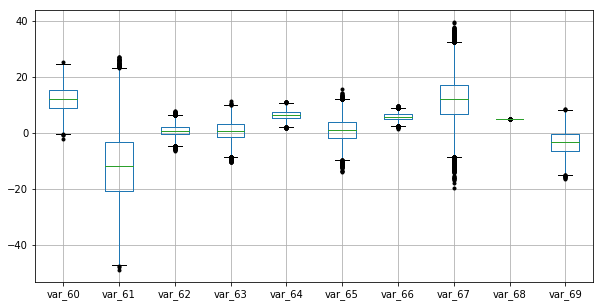

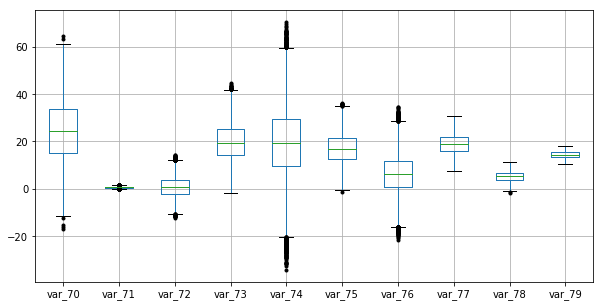

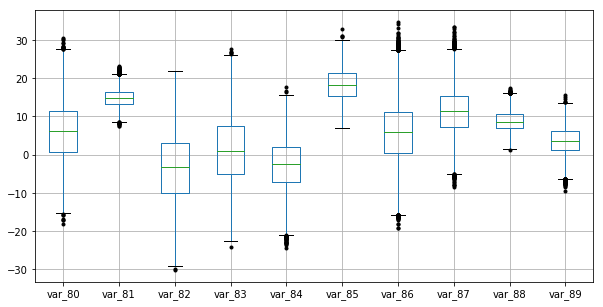

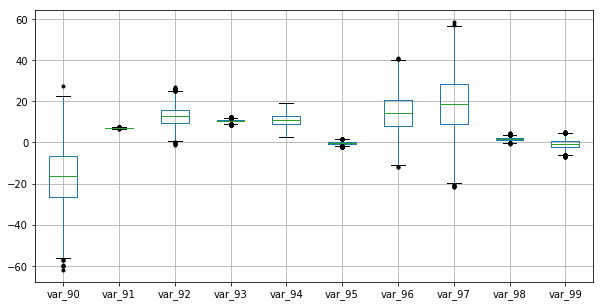

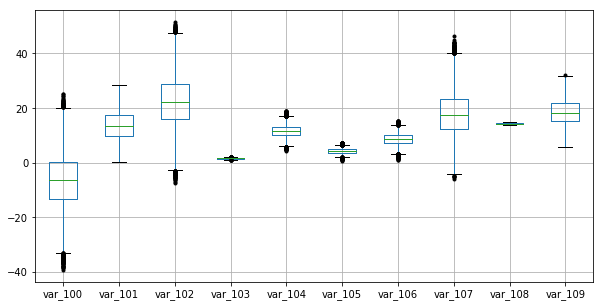

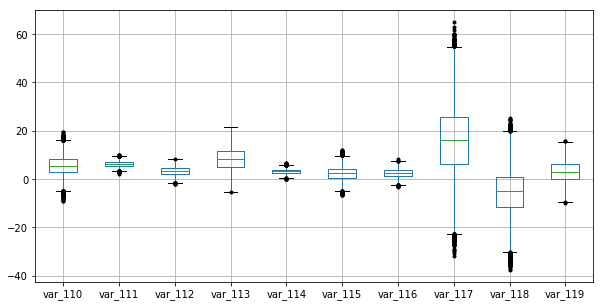

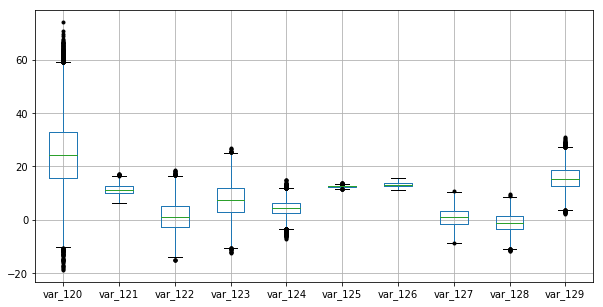

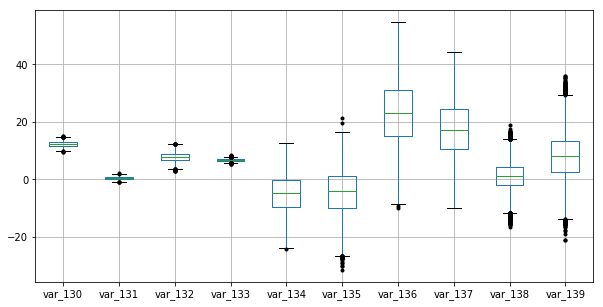

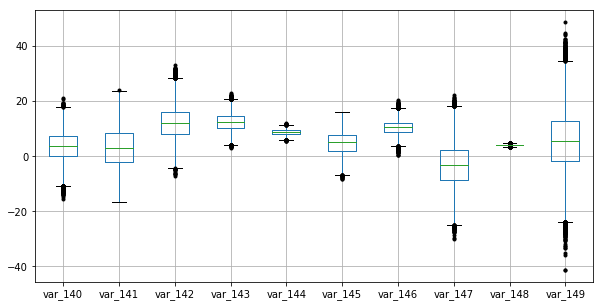

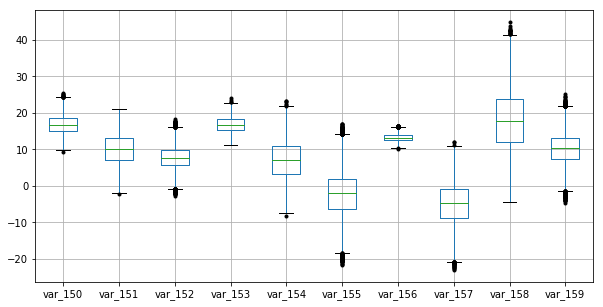

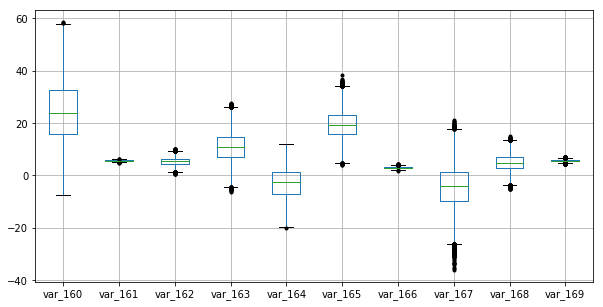

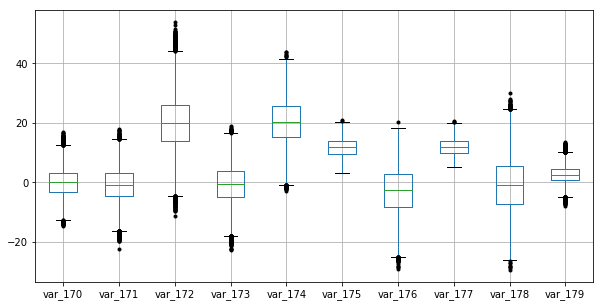

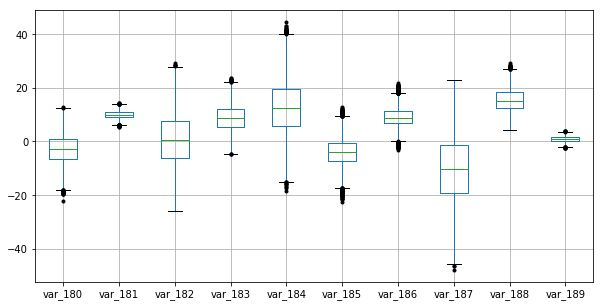

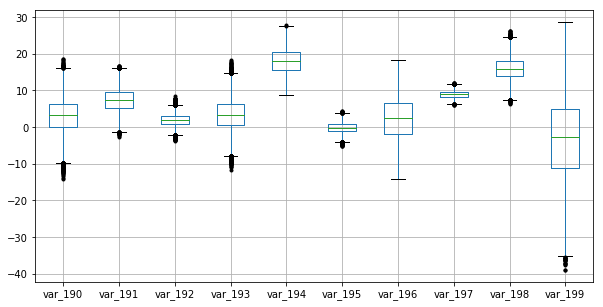

In [16]:
# displaying a boxplot every n columns:
for i in chunks:
    plt.show(df_train.boxplot(column = i, sym='k.', figsize=(10,5)))

In [17]:
# #Detect and delete outliers from data
num_train = df_train.select_dtypes(include=['number'])
for i in num_train:
    print(i)
    q75, q25 = np.percentile(df_train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    df_train = df_train.drop(df_train[df_train.loc[:,i] < min].index)
    df_train = df_train.drop(df_train[df_train.loc[:,i] > max].index)

var_0
1.9973250000000018
19.214725
var_1
-13.888612499999997
10.507087499999999
var_2
3.031512499999998
18.207612500000003
var_3
0.6484500000000004
12.929649999999999
var_4
6.3163750000000025
15.827774999999997
var_5
-29.38955
19.11405
var_6
2.9145000000000008
7.856099999999998
var_7
6.206024999999997
26.839825000000005
var_8
-10.2005625
10.8209375
var_9
3.6705499999999995
11.53255
var_10
-15.5628
16.3516
var_11
-20.0544
13.399200000000002
var_12
13.488700000000001
14.569499999999998
var_13
-5.730549999999998
23.077849999999998
var_14
0.5459000000000014
14.504299999999999
var_15
13.345000000000002
15.792199999999998
var_16
2.048700000000002
16.4591
var_17
-24.981524999999998
13.696475
var_18
-8.5675
38.7573
var_19
-11.95475
36.660849999999996
var_20
-5.251424999999999
31.758375
var_21
-5.760100000000001
40.4015
var_22
-3.984325000000001
12.459875
var_23
1.4802499999999994
4.557450000000001
var_24
-1.1814875000000011
22.2772125
var_25
12.845600000000001
14.4744
var_26
-20.6719375
12.258

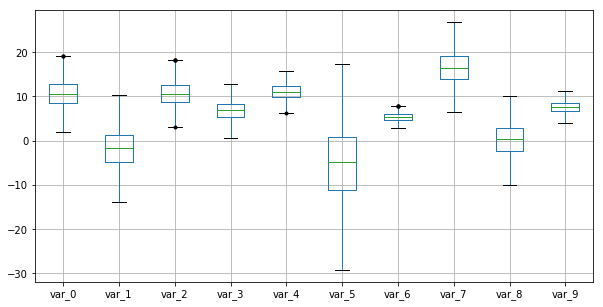

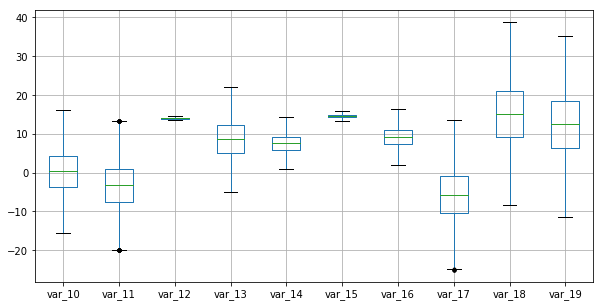

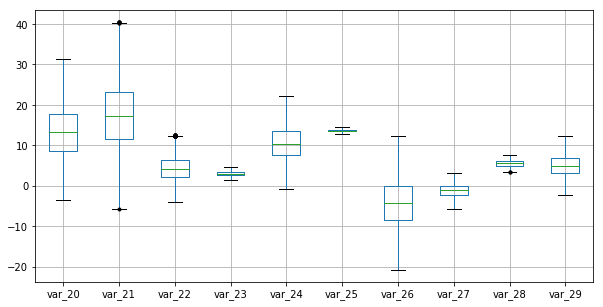

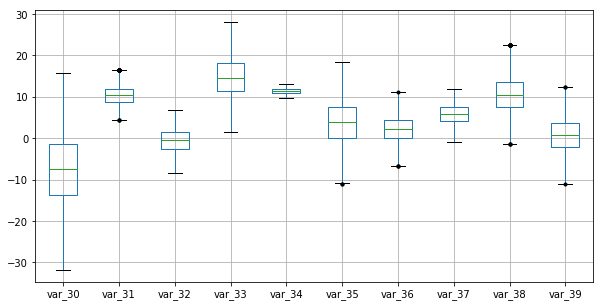

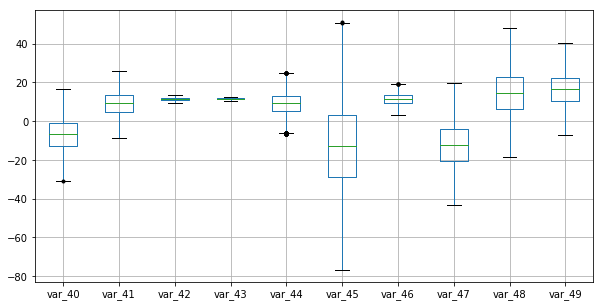

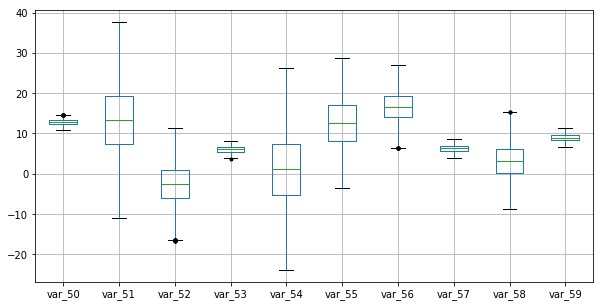

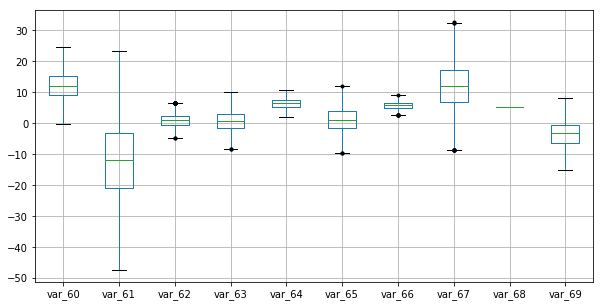

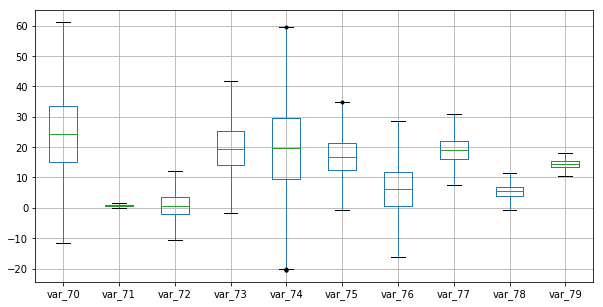

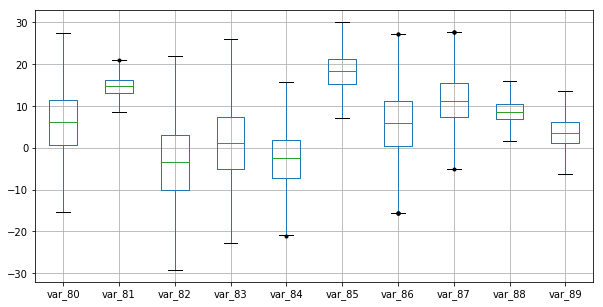

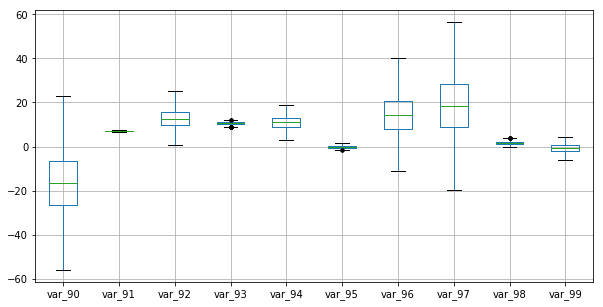

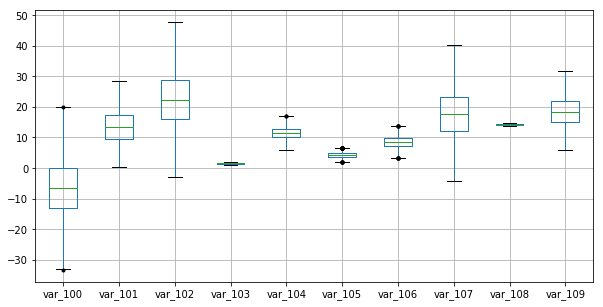

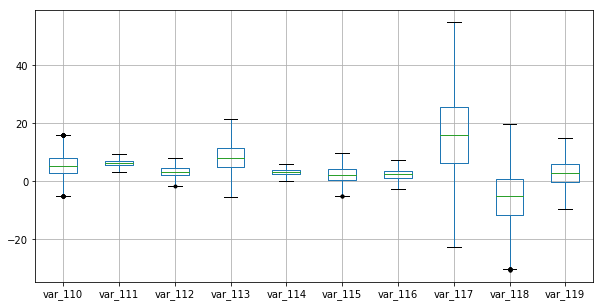

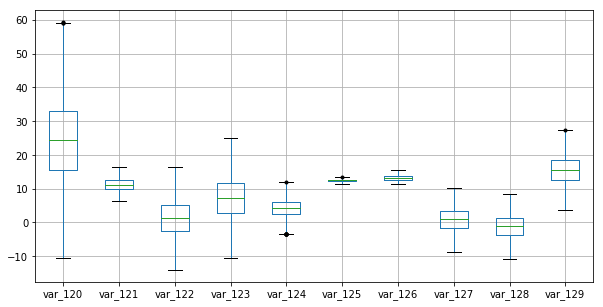

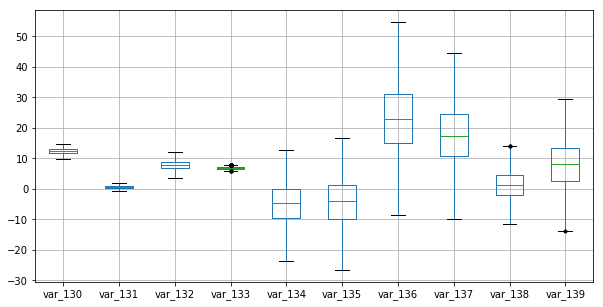

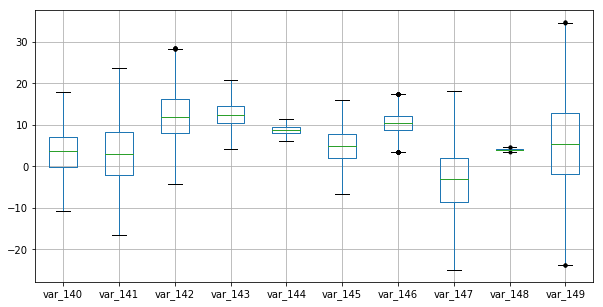

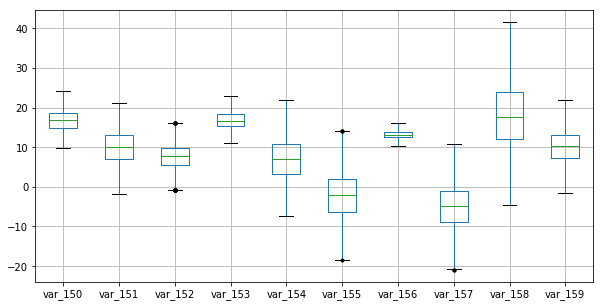

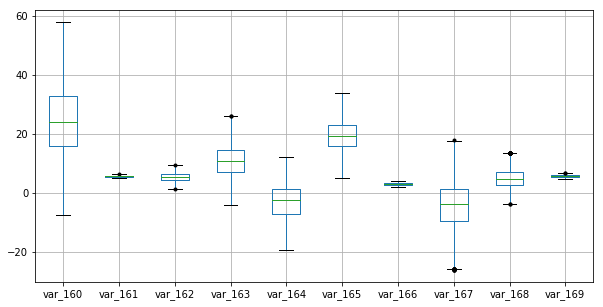

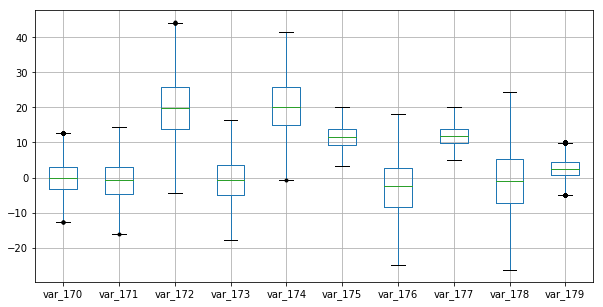

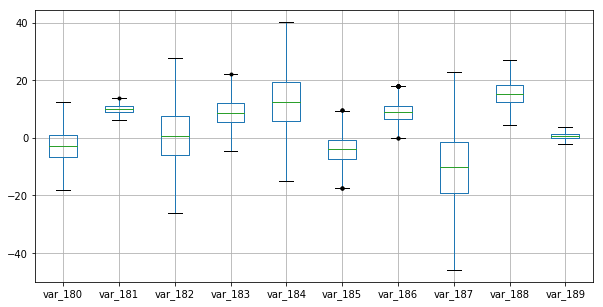

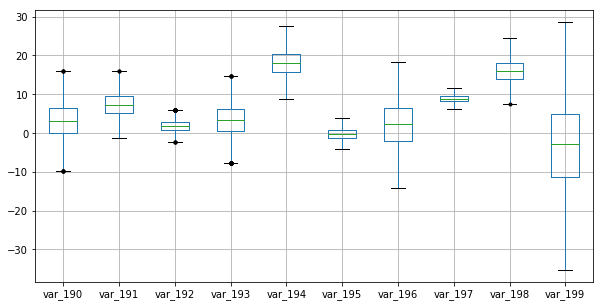

In [18]:
# displaying a boxplot every n columns:
for i in chunks:
    plt.show(df_train.boxplot(column = i, sym='k.', figsize=(10,5)))

In [19]:
target=df_train['target']
df_train = df_train.drop(['ID_code','target'], axis=1)

In [20]:
##Correlation analysis
#Correlation plot
corr = df_train.corr()

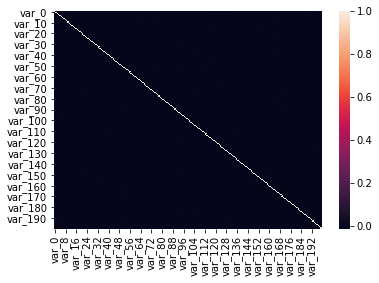

In [21]:
sns.heatmap(corr)

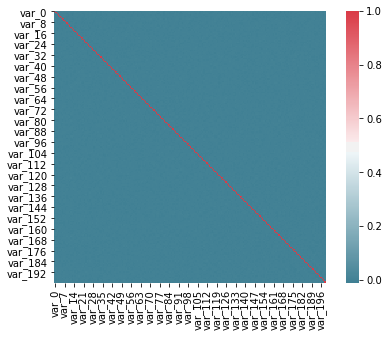

In [22]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_train.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
df_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


In [24]:
df_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


Text(0.5, 1.0, 'Pearson Correlation')

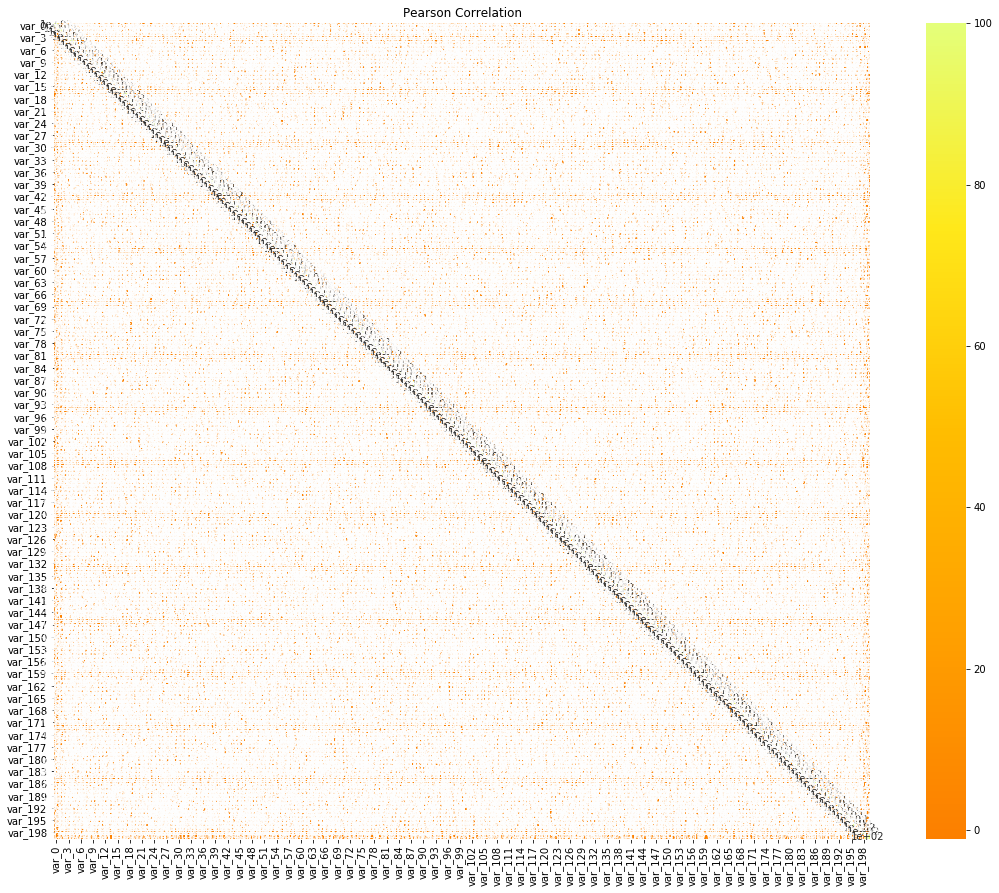

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr()*100, square=True, annot=True, cmap='Wistia_r')
plt.title('Pearson Correlation')

In [26]:
# #Standarisation(putting all the variables in single scale)
for i in num_train:
    print(i)
    df_train[i] = (df_train[i] - df_train[i].mean())/df_train[i].std()

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [27]:
df_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.578728,-1.272068,0.454027,-0.833503,0.235860,-0.535435,-0.334458,0.608947,-1.563650,-1.474083,...,0.263759,-1.148506,0.832977,-0.418098,0.168799,-1.583033,1.023302,-0.374047,-1.030726,0.214392
2,-0.683015,-0.274095,0.519442,0.537069,-0.306121,-0.510050,1.775701,-0.564801,-1.563440,-1.307683,...,-0.073251,0.783441,-0.174259,-0.419413,1.152027,2.303425,-1.616908,-0.695353,-0.384178,0.357107
3,0.125395,-0.127410,-0.667540,0.195821,0.929475,0.411208,0.503243,-0.474234,-1.846059,0.548631,...,0.270633,-0.890164,-0.828756,-0.486300,1.608463,-0.792201,-0.957979,1.502448,0.697064,-0.544139
4,-0.278134,0.037676,0.820750,-0.077432,0.739763,0.955846,0.616270,0.791779,1.793620,0.089836,...,-1.041783,0.694210,-1.425540,1.480014,-1.501588,-0.961635,0.298751,0.645884,0.706287,-0.525992
5,0.262566,-0.168508,0.719593,0.896185,-0.071851,1.097233,-1.012971,-0.386300,0.989255,-1.286225,...,-2.102868,-0.273670,2.313463,-0.734492,-0.972690,0.822860,-1.085701,0.932346,-1.097116,-0.137508


In [28]:
##DECISION TREE


##Developing model on the top of the data
#Import Libraries for decision tree
#replace target categories with Yes or No
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix
x = df_train
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140058, 200), (35015, 200), (140058,), (35015,))

In [29]:
###Logistic Regression

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn import metrics
a=accuracy_score(y_test,y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)
print("Accuracy: %f"%a)

Confusion Matrix:
[[31165   419]
 [ 2526   905]]
Accuracy: 0.915893


In [31]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.92502449 0.68353474]
recall: [0.98673379 0.2637715 ]
fscore: [0.95488319 0.38065195]


In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

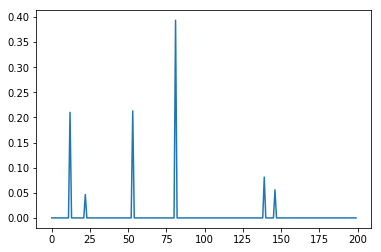

In [33]:
plt.plot(clf_gini.feature_importances_)

In [34]:
dt_pred = clf_gini.predict(x_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score
print("Accuracy score %f" % accuracy_score(y_test,dt_pred))
c=confusion_matrix(y_test,dt_pred)
print("Confusion Matrix:")
print(c)

Accuracy score 0.902013
Confusion Matrix:
[[31584     0]
 [ 3431     0]]


In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, dt_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.90201342 0.        ]
recall: [1. 0.]
fscore: [0.94848271 0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
TP=c[0][0]
FP=c[0][1]
FN=c[1][0]
TN=c[1][1]
print("True Positive: %d"%TP)
print("False Positive: %d"%FP)
print("False Negative: %d"%FN)
print("True Negative: %d"%TN)

True Positive: 31584
False Positive: 0
False Negative: 3431
True Negative: 0


In [40]:
##Rndom forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0,criterion="gini",max_depth=100)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [41]:
print("Accuracy score %f" % accuracy_score(y_test,rf_pred))
d=confusion_matrix(y_test,rf_pred)
print(d)

Accuracy score 0.902385
[[31583     1]
 [ 3417    14]]


In [42]:
precision, recall, fscore, support = score(y_test, rf_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.90237143 0.93333333]
recall: [0.99996834 0.00408044]
fscore: [0.94866635 0.00812536]


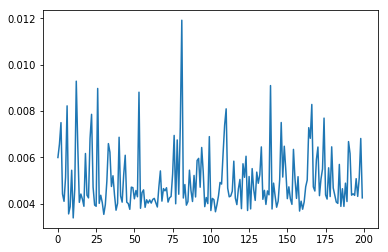

In [43]:
plt.plot(classifier.feature_importances_)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_test.iloc[:,1:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
df_test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [46]:
test_data_std=pd.DataFrame(sc.transform(df_test.iloc[:,1:]))

In [47]:
(pd.DataFrame(classifier.predict(test_data_std))).shape

(200000, 1)

In [48]:
######Extracting predicted values output from Rndom Forest Model#####################
predictions=classifier.predict(test_data_std)

In [49]:
test_data_std.to_csv('test_data_std.csv')